In [ ]:
#### corona in Serbia last year vs. this year...
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


         dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
40314  31.7.2020  ...                                          15.113849         
40315  30.7.2020  ...                                          13.707775         
40316  29.7.2020  ...                                          12.891905         
40317  28.7.2020  ...                                          11.908232         
40318  27.7.2020  ...                                          11.132866         
...          ...  ...                                                ...         
40370   5.6.2020  ...                                          12.972913         
40371   4.6.2020  ...                                          13.227511         
40372   3.6.2020  ...                                          13.875578         
40373   2.6.2020  ...                                          13.910296         
40374   1.6.2020  ...                                          14.159107         

[61 rows x 12 c

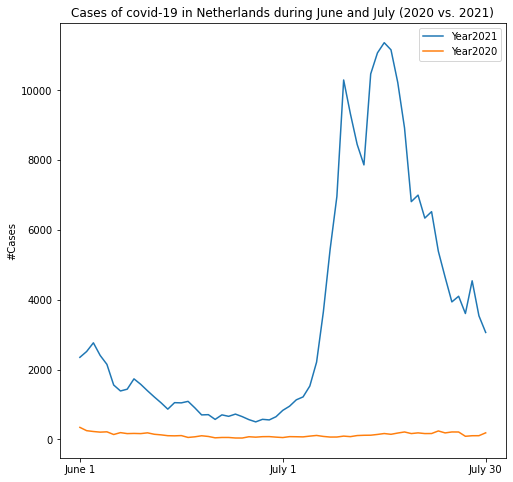

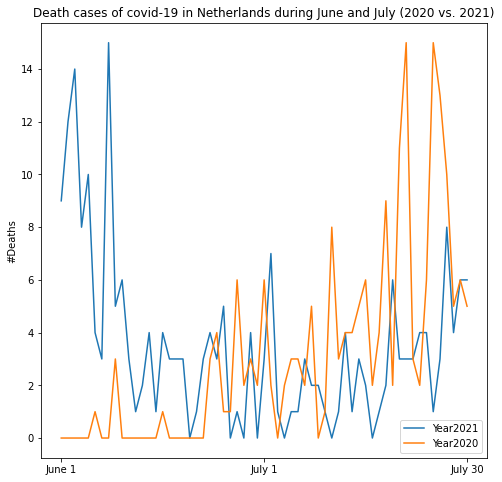

In [ ]:
corona_cases_2021 = pd.read_csv("/content/owid-covid-data.csv") 
corona_cases_2020 = pd.read_csv("/content/corona_cases_202.csv", sep="}")

countryCode = "NLD"
country = "Netherlands"
#### serbia 2020:
corona_cases_2020_serbia = corona_cases_2020[corona_cases_2020["countryterritoryCode"] == countryCode ]
##### 1.6.-31.7. (2020)
corona_cases_2020_serbia_june_july =  corona_cases_2020_serbia[ ( corona_cases_2020_serbia["month"] == 6 ) | ( corona_cases_2020_serbia["month"] == 7 ) ]
corona_cases_2020_serbia_june_july
print(corona_cases_2020_serbia_june_july)
##### 1.6.-31.7. (2021)
corona_cases_2021_serbia =  corona_cases_2021[corona_cases_2021["location"] == country ]
corona_cases_2021_serbia_june_july = corona_cases_2021_serbia[ ( corona_cases_2021_serbia["date"]>= "2021-06-01" ) & (  corona_cases_2021_serbia["date"] <= "2021-07-31"  )  ]
print(corona_cases_2021_serbia_june_july)

###### plot year 2020 vs. year 2021:
x_axis_len = corona_cases_2021_serbia_june_july.shape[0]
x_vals = np.arange(0, x_axis_len, 1)

plt.figure(figsize=(8, 8))
plt.title("Cases of covid-19 in " + country + " during June and July (2020 vs. 2021)")
plt.plot( x_vals, corona_cases_2021_serbia_june_july["new_cases"], label="Year2021")
plt.plot( x_vals, corona_cases_2020_serbia_june_july["cases"], label="Year2020")
plt.xticks([0, 30, 60], [ "June 1", "July 1", "July 30" ])
plt.ylabel("#Cases")
plt.legend(loc="best")
plt.savefig("cases_infected.png")
plt.show()
#### deaths 
plt.figure(figsize=(8, 8))
plt.title("Death cases of covid-19 in " + country + " during June and July (2020 vs. 2021)")
plt.plot( x_vals, corona_cases_2021_serbia_june_july["new_deaths"], label="Year2021")
plt.plot( x_vals, corona_cases_2020_serbia_june_july["deaths"], label="Year2020")
plt.xticks([0, 30, 60], [ "June 1", "July 1", "July 30" ])
plt.ylabel("#Deaths")
plt.legend(loc="best")
plt.savefig("cases_deaths.png")
plt.show()



In [ ]:
corona_cases_2021

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,SMR,Europe,San Marino,2021-03-10,4030.0,46.0,28.714,77.0,0.0,0.286,118745.948,1355.413,846.081,2268.843,0.0,8.419,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3668.0,3668.0,NaN,603.0,398.0,10.81,10.81,NaN,11727.0,60.19,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.8,84.97,NaN,NaN
82938,SMR,Europe,San Marino,2021-03-11,4062.0,32.0,27.857,77.0,0.0,0.286,119688.844,942.896,820.825,2268.843,0.0,8.419,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4284.0,4284.0,NaN,616.0,414.0,12.62,12.62,NaN,12199.0,60.19,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.8,84.97,NaN,NaN
82939,SMR,Europe,San Marino,2021-03-12,4096.0,34.0,28.571,77.0,0.0,0.143,120690.671,1001.827,841.871,2268.843,0.0,4.209,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4806.0,4806.0,NaN,522.0,418.0,14.16,14.16,NaN,12317.0,60.19,33938.0,556.667,NaN,NaN,NaN,56861.470,NaN,NaN,5.64,NaN,NaN,NaN,3.8,84.97,NaN,NaN
82940,SMR,Europe,San Marino,2021-03-13,4126.0,30.0,29.143,77.0,0.0,0.143,121574.636,883.965,858.709

In [ ]:
covd_2021 = corona_cases_2021_serbia_june_july["new_deaths"].values
covd_2020 = corona_cases_2020_serbia_june_july["deaths"].values

## stats test difference significant: Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon, kruskal, friedmanchisquare

print(wilcoxon(covd_2020, covd_2021))  
#print( kruskal(covd_2020, covd_2021))  

 

WilcoxonResult(statistic=707.5, pvalue=0.4585478631091082)


In [ ]:
######## corona cases (number of tested / infected / vaccinated ==>) May ==> Jully corona_cases_2021
corona_cases_2021_serbia_june_july
location = "Iceland"
#people_vaccinated, new_cases, new_deaths, icu_patients
corona_cases_2021_italy = corona_cases_2021[ corona_cases_2021["location"] == location ]
corona_cases_italy = corona_cases_2021_italy[["date", "people_vaccinated", "new_cases", "new_deaths", "icu_patients", "new_tests", "population"]]
corona_cases_2020_italy = corona_cases_italy[ (corona_cases_italy["date"] >= "2020-05-15")  & ( corona_cases_italy["date"] <= "2020-07-31" )  ]
corona_cases_2021_italy = corona_cases_italy[ (corona_cases_italy["date"] >= "2021-05-15")  & ( corona_cases_italy["date"] <= "2021-07-31" )  ]

corona_cases_2020_italy["rate_positive"] = corona_cases_2020_italy["new_cases"] / corona_cases_2020_italy["new_tests"]  *100
corona_cases_2021_italy["rate_positive"] = corona_cases_2021_italy["new_cases"] / corona_cases_2021_italy["new_tests"]  *100

corona_cases_2021_italy_pos = corona_cases_2021_italy[corona_cases_2021_italy["new_deaths"] < 0]
corona_cases_2021_italy["new_deaths"] = corona_cases_2021_italy["new_deaths"].apply(lambda x: abs(x))
corona_cases_2020_italy["new_deaths"] = corona_cases_2020_italy["new_deaths"].apply(lambda x: abs(x))

corona_cases_2021_italy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,date,people_vaccinated,new_cases,new_deaths,icu_patients,new_tests,population,rate_positive
44253,2021-05-15,NaN,0.0,0.0,NaN,683.0,341250.0,0.000000
44254,2021-05-16,NaN,0.0,0.0,NaN,828.0,341250.0,0.000000
44255,2021-05-17,NaN,11.0,0.0,NaN,1357.0,341250.0,0.810612
44256,2021-05-18,152584.0,1.0,0.0,NaN,1198.0,341250.0,0.083472
44257,2021-05-19,156058.0,2.0,0.0,NaN,1248.0,341250.0,0.160256
...,...,...,...,...,...,...,...,...
44326,2021-07-27,NaN,124.0,0.0,NaN,5935.0,341250.0,2.089301
44327,2021-07-28,NaN,117.0,0.0,NaN,4813.0,341250.0,2.430916
44328,2021-07-29,NaN,131.0,0.0,NaN,4363.0,341250.0,3.002521
44329,2021-07-30,269095.0,125.0,0.0,NaN,4160.0,341250.0,3.004808


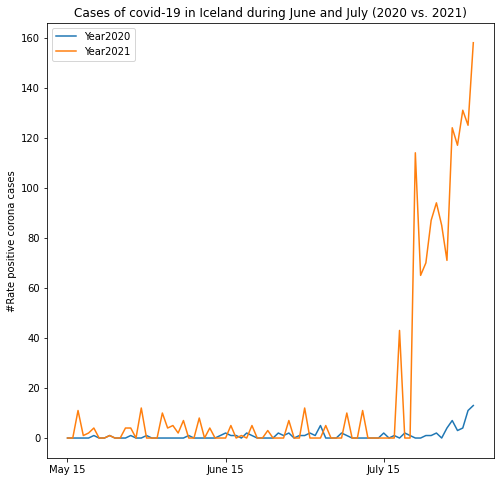

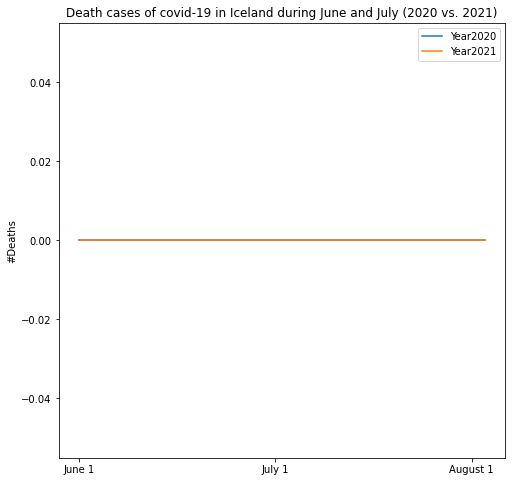

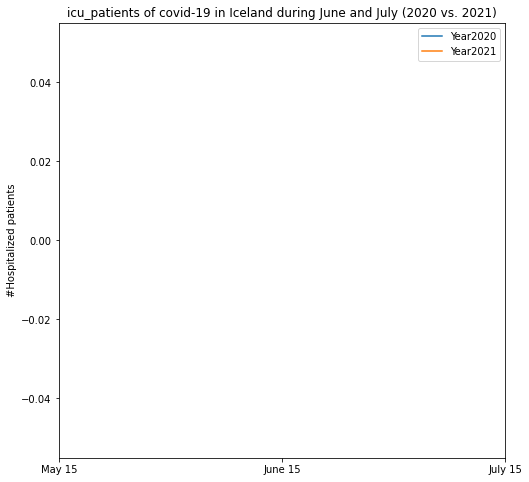

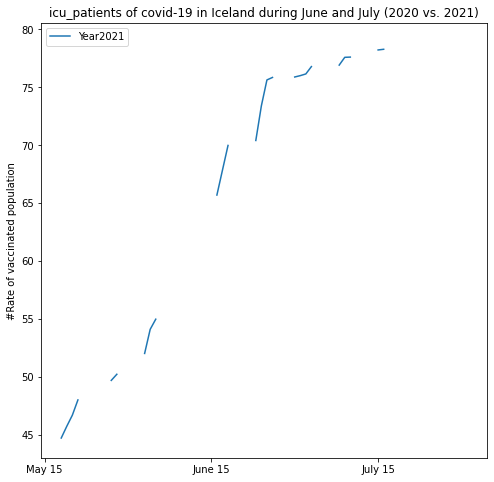

In [ ]:
###### plot year 2020 vs. year 2021:
x_axis_len = corona_cases_2020_italy.shape[0]
x_vals = np.arange(0, x_axis_len, 1)

plt.figure(figsize=(8, 8))
plt.title("Cases of covid-19 in " + location + " during June and July (2020 vs. 2021)")
plt.plot( x_vals, corona_cases_2020_italy["new_cases"], label="Year2020")#rate_positive
plt.plot( x_vals, corona_cases_2021_italy["new_cases"], label="Year2021")
plt.xticks([0, 30, 60], [ "May 15", "June 15", "July 15" ])
plt.ylabel("#Rate positive corona cases")
plt.legend(loc="best")
plt.savefig("cases_infected.png")
plt.show()


#### deaths 
plt.figure(figsize=(8, 8))
plt.title("Death cases of covid-19 in " + location + " during June and July (2020 vs. 2021)")
plt.plot( x_vals[ 0: len(x_vals)-15 ], corona_cases_2020_italy["new_deaths"][15:], label="Year2020")
plt.plot( x_vals[0 : len(x_vals) - 15 ], corona_cases_2021_italy["new_deaths"][15:], label="Year2021")
plt.xticks([0, 30, 60], [ "June 1", "July 1", "August 1" ])
plt.ylabel("#Deaths")
plt.legend(loc="best")
plt.savefig("cases_deaths.png")
plt.show()

# icu patients:

plt.figure(figsize=(8, 8))
plt.title("icu_patients of covid-19 in " + location + " during June and July (2020 vs. 2021)")
plt.plot( x_vals, corona_cases_2020_italy["icu_patients"], label="Year2020")
plt.plot( x_vals, corona_cases_2021_italy["icu_patients"], label="Year2021")
plt.xticks([0, 30, 60], [ "May 15", "June 15", "July 15" ])
plt.ylabel("#Hospitalized patients")
plt.legend(loc="best")
plt.savefig("icu_patients.png")
plt.show()

# vaccinated:
population = corona_cases_2021_italy["population"].values

plt.figure(figsize=(8, 8))
plt.title("icu_patients of covid-19 in " + location + " during June and July (2020 vs. 2021)")
plt.plot( x_vals, corona_cases_2021_italy["people_vaccinated"] / population[0] * 100, label="Year2021")
plt.xticks([0, 30, 60], [ "May 15", "June 15", "July 15" ])
plt.ylabel("#Rate of vaccinated population")
plt.legend(loc="best")
plt.savefig("vaccianted.png")
plt.show()

